# 셀 합치기
- shift + m

In [1]:
1

2

3

3

# 셀 나누기
- shift + ctrl + -(BACKSPACE 옆옆)

#### iris는 꽃 품좀에 관련된 데이터로 파이썬 내장 데이터이다. 

In [2]:
from sklearn.datasets import load_iris # 데이터 셋 받아오기
import pandas as pd
import matplotlib.pyplot as plt # 그래프
from sklearn.neighbors import KNeighborsClassifier # KNN모델 받아오기
from sklearn.model_selection import train_test_split # 훈련과 테스트셋 나누기
import warnings # 경고창 없애기

In [3]:
warnings.filterwarnings('ignore') # 경고창을 무시하는 함수

# 1. 문제정의 
- 붓꽃 데이터를 사용해서 3가지 품종을 분류해 보자

# 2. 데이터 수집 

In [8]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

# 3. 데이터 전처리 

In [6]:
iris.info() # 데이터 프레임이 아니기에 오류가남 그래서 먼저 데이터 프레임의 형태로 만들어줘야함

AttributeError: info

In [9]:
type(iris.data)

numpy.ndarray

In [10]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
import pandas as pd
iris_df = pd.DataFrame(iris['data'],columns = iris['feature_names'])

In [12]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
!pip install tabulate

from tabulate import tabulate 

print(tabulate(iris_df, headers = 'keys', tablefmt = 'psql')) 

+-----+---------------------+--------------------+---------------------+--------------------+
|     |   sepal length (cm) |   sepal width (cm) |   petal length (cm) |   petal width (cm) |
|-----+---------------------+--------------------+---------------------+--------------------|
|   0 |                 5.1 |                3.5 |                 1.4 |                0.2 |
|   1 |                 4.9 |                3   |                 1.4 |                0.2 |
|   2 |                 4.7 |                3.2 |                 1.3 |                0.2 |
|   3 |                 4.6 |                3.1 |                 1.5 |                0.2 |
|   4 |                 5   |                3.6 |                 1.4 |                0.2 |
|   5 |                 5.4 |                3.9 |                 1.7 |                0.4 |
|   6 |                 4.6 |                3.4 |                 1.4 |                0.3 |
|   7 |                 5   |                3.4 |          

In [14]:
# print문 안에서 데이터프레임 출력하기
print(display(iris_df))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


None


In [15]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [16]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 4. 탐색적 데이터 분석 

# 5. 모델 선택 및 하이퍼 파라미터 튜닝 

In [19]:
knn = KNeighborsClassifier(n_neighbors = 3)

# 6. 학습 

In [17]:
# 문제
X = iris_df
y = iris['target']

In [18]:
X.shape, y.shape

((150, 4), (150,))

In [20]:
# train, test
# 75 : 25의 비율로 데이터를 나눔(train_test_split(X,y)
# 데이터를 섞을 수 있다. random_state = 숫자(임의의 숫자, 범위가 정해져 있지 않다) //디폴트로 random_state가 
# 내장되어 있는데 만약 숫자를 지정하면 그 방법으로 데이터를 섞는다. 즉 평가 기준을 고정 시킬 수 있다.

# train과 test의 비율을 조정할 수 있다. test_size = 0~1(0.5 = 훈련, 테스트 -> 반반)
# train의 비율을 높힐때 : 학습하고 싶은 데이터를 늘릴 때
# test의 비율을 높힐때 : 예측값에 대한 신뢰도를 높히고 싶을 때
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 3000, test_size = 0.3)
# 대체
#X_train = X.iloc[:135]
#X_test = X.iloc[135:]
#y_train = y.iloc[:135]
#y_test = y.iloc[135:]

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [22]:
# 학습하기
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

# 7. 평가 

In [23]:
# 예측 : predict
# 평가 : score
knn.predict(X_test)

array([1, 0, 1, 1, 0, 2, 0, 0, 1, 2, 2, 1, 0, 1, 2, 2, 1, 1, 1, 0, 0, 2,
       0, 2, 1, 1, 2, 1, 0, 0, 1, 2, 2, 0, 2, 0, 2, 1, 2, 1, 0, 2, 2, 1,
       2])

In [24]:
# X_test를 통해서 예측값을 뽑아냄
# y_test(실제 정답)를 통해서 예측값과 실제 정답을 비교해서 얼마나 맞췄는지를 나타냄
knn.score(X_test,y_test)

0.9333333333333333

In [25]:
knn.predict([[5.1,3.2,5.3,1.8]])

array([1])

# 하이퍼 파라미터 튜닝/학습/평가 

In [ ]:
# 지금 test_size 가 0.5가 되있어서
# train 75개 test 75개가 되어있어요!
# 그런데 for문에는 범위가 1 ~ 105로 되있어서
# 찾아야하는 이웃의 수가 데이터의 범위를 넘어가서 오류가 나타났습니다
# test_size를 줄여서 데이터수를 확보하거나 for문의 범위를 줄여줘야 할거에요
# for문 범위한번 줄여볼게요
# 잘 돌아가는걸 확인했어요 !

In [32]:
# 평가값을 담을 리스트 두개 생성
test_list = []
train_list = []

# for문의 범위는 이웃의 숫자
for k in range(1,105,1):
    m = KNeighborsClassifier(n_neighbors=k) # 이웃의 숫자가 변하면서 모델 생성
    m.fit(X_train, y_train) # 
    
    test_score = m.score(X_test,y_test) # test_score = 0~1
    test_list.append(test_score)
    
    train_score = m.score(X_train,y_train)
    train_list.append(train_score)

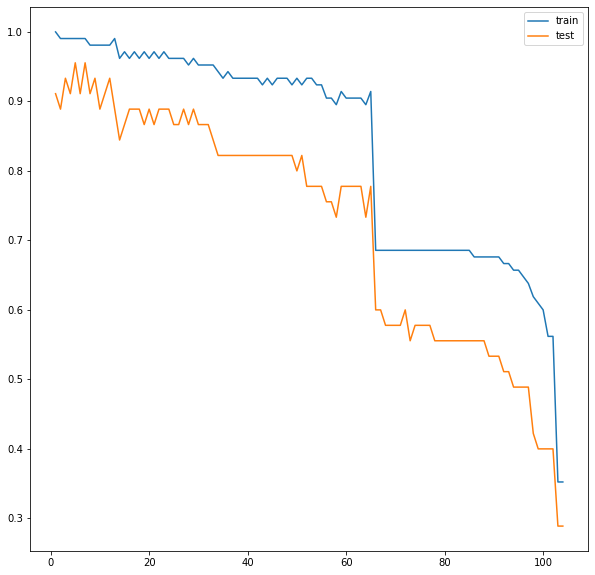

In [33]:
plt.figure(figsize=(10,10))
plt.plot(range(1,105,1), train_list, label='train')
plt.plot(range(1,105,1), test_list, label='test')

plt.legend()
plt.show()

In [ ]:
import pandas as pd

In [ ]:
data = {'nam' : ['a','b','c'],'pem' : ['1','2','3'],'num' : [1,2,3]}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.sum()

In [ ]:
df.mean()

In [ ]:
df.pem